Business Objective:
Generate the features from the dataset and use them to recommend the books accordingly to the users.


Upload all the given datasets
1.Users
2.Books
3.Ratings

In [18]:
#Import the libraries and load the datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [19]:
from google.colab import files
uploaded = files.upload()

Saving Users.csv to Users (1).csv


In [20]:
userdata=pd.read_csv('Users.csv', encoding='latin-1')
userdata.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [21]:
userdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [22]:
#Checkfor the duplicates
userdata.duplicated().sum()

0

In [23]:
# Split the 'Location' column into City, State, and Country
# Strip() and split() are different Python built-in methods performed on strings.

userdata[['City', 'State', 'Country']] = userdata['Location'].str.split(',', n=2, expand=True)

# Trim any extra spaces
userdata[['City', 'State', 'Country']] = userdata[['City', 'State', 'Country']].apply(lambda x: x.str.strip())

# Display the first few rows to check the extracted columns
userdata.head()


,User-ID,Location,Age,City,State,Country
0,1,"nyc, new york, usa",NaN,nyc,new york,usa
1,2,"stockton, california, usa",18.0,stockton,california,usa
2,3,"moscow, yukon territory, russia",NaN,moscow,yukon territory,russia
3,4,"porto, v.n.gaia, portugal",17.0,porto,v.n.gaia,portugal
4,5,"farnborough, hants, united kingdom",NaN,farnborough,hants,united kingdom


In [24]:
userdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
 3   City      278858 non-null  object 
 4   State     278857 non-null  object 
 5   Country   278856 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 12.8+ MB


In [25]:
#Check for the missing values
userdata.isnull().sum()

,0
User-ID,0
Location,0
Age,110762
City,0
State,1
Country,2


In [26]:
userdata['Age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [27]:
userdata['Age'].mean()

34.75143370454978

In [28]:
# Impute missing Age values with mean
userdata['Age'].fillna(userdata['Age'].mean(),inplace=True)

In [29]:
userdata.isnull().sum()

,0
User-ID,0
Location,0
Age,0
City,0
State,1
Country,2


In [31]:
print((userdata['Age']> 100).value_counts())
print((userdata['Age']< 3).value_counts())

Age
False    278492
True        366
Name: count, dtype: int64
Age
False    278049
True        809
Name: count, dtype: int64


Number of Age outliers: 1175


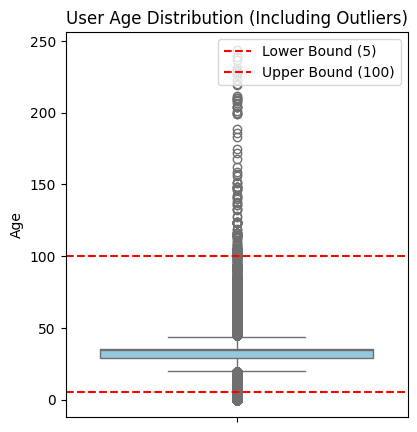

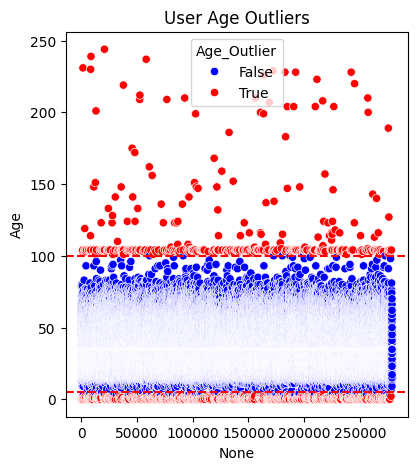

In [32]:
# 1. Box Plots to Visualize Outliers
# -----------------------------
# Create columns to indicate outliers based on defined rules.
userdata['Age_Outlier'] = (userdata['Age'] < 3) | (userdata['Age'] > 100)
plt.figure(figsize=(15, 5))

# Box plot for Age
plt.subplot(1, 3, 1)
sns.boxplot(y=userdata['Age'], color="skyblue")
plt.title("User Age Distribution (Including Outliers)")
plt.axhline(5, color='red', linestyle='--', label='Lower Bound (5)')
plt.axhline(100, color='red', linestyle='--', label='Upper Bound (100)')
plt.legend()


#count of outliers
print("Number of Age outliers:", userdata['Age_Outlier'].sum())

#Scatter Plots Highlighting Outliers
# -----------------------------
plt.figure(figsize=(15, 5))

# Scatter plot for Age with outlier highlighting
plt.subplot(1, 3, 1)
sns.scatterplot(x=userdata.index, y="Age", data=userdata, hue="Age_Outlier",
                palette={False: "blue", True: "red"}, legend="full")
plt.title("User Age Outliers")
plt.axhline(5, color='red', linestyle='--')
plt.axhline(100, color='red', linestyle='--')

In [33]:
userdata.drop('Age_Outlier', axis=1, inplace=True)

In [34]:

userdata = userdata[~((userdata['Age'] > 100) | (userdata['Age'] < 3))]

In [35]:
userdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277683 entries, 0 to 278857
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   277683 non-null  int64  
 1   Location  277683 non-null  object 
 2   Age       277683 non-null  float64
 3   City      277683 non-null  object 
 4   State     277682 non-null  object 
 5   Country   277681 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 14.8+ MB


In [36]:
userdata['Age'].unique()

array([ 34.7514337,  18.       ,  17.       ,  61.       ,  26.       ,
        14.       ,  25.       ,  19.       ,  46.       ,  55.       ,
        32.       ,  24.       ,  20.       ,  34.       ,  23.       ,
        51.       ,  31.       ,  21.       ,  44.       ,  30.       ,
        57.       ,  43.       ,  37.       ,  41.       ,  54.       ,
        42.       ,  50.       ,  39.       ,  53.       ,  47.       ,
        36.       ,  28.       ,  35.       ,  13.       ,  58.       ,
        49.       ,  38.       ,  45.       ,  62.       ,  63.       ,
        27.       ,  33.       ,  29.       ,  66.       ,  40.       ,
        15.       ,  60.       ,  79.       ,  22.       ,  16.       ,
        65.       ,  59.       ,  48.       ,  72.       ,  56.       ,
        67.       ,  80.       ,  52.       ,  69.       ,  71.       ,
        73.       ,  78.       ,   9.       ,  64.       ,  12.       ,
        74.       ,  75.       ,   3.       ,  76.       ,  83. 

In [37]:
# Convert Age column data type to int
userdata['Age'] = userdata['Age'].astype('int')

In [38]:
# Create new column age group as children,youth,adults and senior citizens
def categorize_age(age):
    if age <= 12:
        return "Children"
    elif 13 <= age <= 24:
        return "Youth"
    elif 25 <= age <= 59:
        return "Adults"
    else:
        return "Senior Citizens"

# Apply the function to create 'Age Group' column
userdata["Age Group"] = userdata["Age"].apply(categorize_age)

# Display the first few rows to check the new column
userdata.head()


,User-ID,Location,Age,City,State,Country,Age Group
0,1,"nyc, new york, usa",34,nyc,new york,usa,Adults
1,2,"stockton, california, usa",18,stockton,california,usa,Youth
2,3,"moscow, yukon territory, russia",34,moscow,yukon territory,russia,Adults
3,4,"porto, v.n.gaia, portugal",17,porto,v.n.gaia,portugal,Youth
4,5,"farnborough, hants, united kingdom",34,farnborough,hants,united kingdom,Adults


In [39]:
userdata[userdata.isnull().any(axis=1)]

,User-ID,Location,Age,City,State,Country,Age Group
29419,29420,"st. louis, missouri",68,st. louis,missouri,None,Senior Citizens
134376,134377,lawrenceville,30,lawrenceville,None,None,Adults


In [40]:
# Impute missing Age values with mean
userdata['Country'].fillna('usa',inplace=True)

In [41]:
userdata['State'].fillna('georgia',inplace=True)

In [42]:
userdata.isnull().sum()

,0
User-ID,0
Location,0
Age,0
City,0
State,0
Country,0
Age Group,0


In [43]:
#Cleaned User Dataset
userdata.head()

,User-ID,Location,Age,City,State,Country,Age Group
0,1,"nyc, new york, usa",34,nyc,new york,usa,Adults
1,2,"stockton, california, usa",18,stockton,california,usa,Youth
2,3,"moscow, yukon territory, russia",34,moscow,yukon territory,russia,Adults
3,4,"porto, v.n.gaia, portugal",17,porto,v.n.gaia,portugal,Youth
4,5,"farnborough, hants, united kingdom",34,farnborough,hants,united kingdom,Adults


In [44]:
from google.colab import files
uploaded = files.upload()

Saving Books.csv to Books.csv


In [45]:
booksdata=pd.read_csv('Books.csv',encoding='latin-1')
booksdata.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [46]:
booksdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [47]:
#Check for the duplicates
booksdata.duplicated().sum()

0

In [48]:
booksdata.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,2
Year-Of-Publication,0
Publisher,2
Image-URL-S,0
Image-URL-M,0
Image-URL-L,3


In [49]:
booksdata[booksdata.isnull().any(axis=1)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [50]:
booksdata['ISBN'].unique()

array(['0195153448', '0002005018', '0060973129', ..., '006008667X',
       '0192126040', '0767409752'], dtype=object)

In [51]:
# Define function to locate index of values
def get_indexes(object, value):

    # Empty list
    position_list = []

    # isin() method will return a DataFrame with
    # boolean values, True at the positions
    # where element exists
    result = object.isin([value])

    # any() method will return
    # a boolean series
    series_object = result.any()

    # Get list of column names where
    # element exists
    column_names = list(series_object[series_object == True].index)

    # Iterate over the list of columns and
    # extract the row index where element exists
    for col in column_names:
        rows = list(result[col][result[col] == True].index)

        for row in rows:
            position_list.append((row, col))

    # This list contains a list tuples with
    # the index of element in the dataframe
    return position_list

In [52]:
# Apply get_indexes function to locate NaN values
positions = get_indexes(booksdata, np.nan)
print('Index positions of NaN in books_df: ')
for i in range (len(positions)):
    print(positions[i])

Index positions of NaN in books_df: 
(118033, 'Book-Author')
(187689, 'Book-Author')
(128890, 'Publisher')
(129037, 'Publisher')
(209538, 'Image-URL-L')
(220731, 'Image-URL-L')
(221678, 'Image-URL-L')


In [53]:
# Check NaN to correct missing values
booksdata.iloc[118033]

,118033
ISBN,0751352497
Book-Title,A+ Quiz Masters:01 Earth
Book-Author,NaN
Year-Of-Publication,1999
Publisher,Dorling Kindersley
Image-URL-S,http://images.amazon.com/images/P/0751352497.0...
Image-URL-M,http://images.amazon.com/images/P/0751352497.0...
Image-URL-L,http://images.amazon.com/images/P/0751352497.0...


In [57]:
#Dorling Kindersley
booksdata.at[118033, 'Book-Author'] = 'Dorling Kindersley'
#David Tait.
booksdata.at[187689, 'Book-Author'] = 'David Tait'
print(booksdata.iloc[118033])
print(booksdata.iloc[187689])


ISBN                                                          0751352497
Book-Title                                      A+ Quiz Masters:01 Earth
Book-Author                                           Dorling Kindersley
Year-Of-Publication                                                 1999
Publisher                                             Dorling Kindersley
Image-URL-S            http://images.amazon.com/images/P/0751352497.0...
Image-URL-M            http://images.amazon.com/images/P/0751352497.0...
Image-URL-L            http://images.amazon.com/images/P/0751352497.0...
Name: 118033, dtype: object
ISBN                                                          9627982032
Book-Title             The Credit Suisse Guide to Managing Your Perso...
Book-Author                                                   David Tait
Year-Of-Publication                                                 1995
Publisher                                 Edinburgh Financial Publishing
Image-URL-S            

In [115]:
booksdata.iloc[187689]

,191021
ISBN,0553486659
Book-Title,Lacey's Crush (Sweet Valley Jr. High No. 6)
Book-Author,Jamie Suzanne
Year-Of-Publication,1999
Publisher,Sweet Valley
Image-URL-S,http://images.amazon.com/images/P/0553486659.0...
Image-URL-M,http://images.amazon.com/images/P/0553486659.0...
Image-URL-L,http://images.amazon.com/images/P/0553486659.0...


In [ ]:
print(booksdata.iloc[128890])
print(booksdata.iloc[129037])

ISBN                                                          193169656X
Book-Title                                                   Tyrant Moon
Book-Author                                              Elaine Corvidae
Year-Of-Publication                                                 2002
Publisher                                                            NaN
Image-URL-S            http://images.amazon.com/images/P/193169656X.0...
Image-URL-M            http://images.amazon.com/images/P/193169656X.0...
Image-URL-L            http://images.amazon.com/images/P/193169656X.0...
Name: 128890, dtype: object
ISBN                                                          1931696993
Book-Title                                               Finders Keepers
Book-Author                                              Linnea Sinclair
Year-Of-Publication                                                 2001
Publisher                                                            NaN
Image-URL-S            

In [58]:
booksdata.at[128890, 'Publisher'] = 'Mundania Press LLC'
print(booksdata.iloc[128890])
booksdata.at[129037, 'Publisher'] = 'Scribner in the US and Hodder & Stoughton in the UK'
print(booksdata.iloc[129037])

ISBN                                                          193169656X
Book-Title                                                   Tyrant Moon
Book-Author                                              Elaine Corvidae
Year-Of-Publication                                                 2002
Publisher                                             Mundania Press LLC
Image-URL-S            http://images.amazon.com/images/P/193169656X.0...
Image-URL-M            http://images.amazon.com/images/P/193169656X.0...
Image-URL-L            http://images.amazon.com/images/P/193169656X.0...
Name: 128890, dtype: object
ISBN                                                          1931696993
Book-Title                                               Finders Keepers
Book-Author                                              Linnea Sinclair
Year-Of-Publication                                                 2001
Publisher              Scribner in the US and Hodder & Stoughton in t...
Image-URL-S            

In [59]:
booksdata.at[209538, 'Image-URL-L'] = 'Image not available'
booksdata.at[220731, 'Image-URL-L'] = 'Image not available'
booksdata.at[221678, 'Image-URL-L'] = 'Image not available'


In [60]:
booksdata['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [61]:
booksdata.loc[booksdata['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,Image not available
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,Image not available


In [64]:
booksdata.at[209538, 'Year-Of-Publication'] = '2000'
print(booksdata.iloc[209538])
booksdata.at[221678, 'Year-Of-Publication'] = '2000'
print(booksdata.iloc[221678])

ISBN                                                          078946697X
Book-Title             DK Readers: Creating the X-Men, How It All Beg...
Book-Author                                                         2000
Year-Of-Publication                                                 2000
Publisher              http://images.amazon.com/images/P/078946697X.0...
Image-URL-S            http://images.amazon.com/images/P/078946697X.0...
Image-URL-M            http://images.amazon.com/images/P/078946697X.0...
Image-URL-L                                          Image not available
Name: 209538, dtype: object
ISBN                                                          0789466953
Book-Title             DK Readers: Creating the X-Men, How Comic Book...
Book-Author                                                         2000
Year-Of-Publication                                                 2000
Publisher              http://images.amazon.com/images/P/0789466953.0...
Image-URL-S            

In [65]:
booksdata.loc[booksdata['Year-Of-Publication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,Image not available


In [66]:
booksdata.at[220731, 'Year-Of-Publication'] = '2003'
booksdata.iloc[220731]

,220731
ISBN,2070426769
Book-Title,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M..."
Book-Author,2003
Year-Of-Publication,2003
Publisher,http://images.amazon.com/images/P/2070426769.0...
Image-URL-S,http://images.amazon.com/images/P/2070426769.0...
Image-URL-M,http://images.amazon.com/images/P/2070426769.0...
Image-URL-L,Image not available


In [67]:
# Convert 'Year-Of-Publication' to numeric, coerce errors to NaN
booksdata["Year-Of-Publication"] = pd.to_numeric(booksdata["Year-Of-Publication"], errors="coerce")

Number of Year outliers: 4632


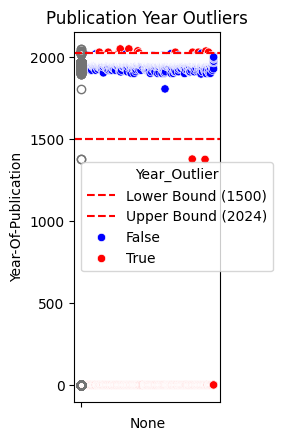

In [68]:
# Box plot for Publication Year
booksdata['Year_Outlier'] = (booksdata['Year-Of-Publication'] < 1500) | (booksdata['Year-Of-Publication'] > 2024)
plt.subplot(1, 3, 2)
sns.boxplot(y=booksdata['Year-Of-Publication'], color="lightgreen")
plt.title("Publication Year Distribution (Including Outliers)")
plt.axhline(1500, color='red', linestyle='--', label='Lower Bound (1500)')
plt.axhline(2024, color='red', linestyle='--', label='Upper Bound (2024)')
plt.legend()

#count of outliers
print("Number of Year outliers:", booksdata['Year_Outlier'].sum())

# Scatter plot for Publication Year with outlier highlighting
plt.subplot(1, 3, 2)
sns.scatterplot(x=booksdata.index, y="Year-Of-Publication", data=booksdata, hue="Year_Outlier",
                palette={False: "blue", True: "red"}, legend="full")
plt.title("Publication Year Outliers")
plt.axhline(1500, color='red', linestyle='--')
plt.axhline(2024, color='red', linestyle='--')

In [69]:

booksdata.drop('Year_Outlier', axis=1, inplace=True)

In [70]:
# Check unique Year-of-Publication values
print(sorted(booksdata['Year-Of-Publication'].unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [71]:
booksdata = booksdata[~((booksdata['Year-Of-Publication'] > 2024) | (booksdata['Year-Of-Publication'] < 1500))]

In [72]:
print(sorted(booksdata['Year-Of-Publication'].unique()))

[1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024]


In [75]:
#Cleaned Books dataset
booksdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266728 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 266728 non-null  object
 1   Book-Title           266728 non-null  object
 2   Book-Author          266728 non-null  object
 3   Year-Of-Publication  266728 non-null  int64 
 4   Publisher            266728 non-null  object
 5   Image-URL-S          266728 non-null  object
 6   Image-URL-M          266728 non-null  object
 7   Image-URL-L          266728 non-null  object
dtypes: int64(1), object(7)
memory usage: 18.3+ MB


In [74]:
from google.colab import files
uploaded = files.upload()

Saving Ratings.csv to Ratings.csv


In [76]:
ratingsdata=pd.read_csv('Ratings.csv',encoding='latin-1')
ratingsdata.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [77]:
ratingsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [78]:
#Check for the duplicates
ratingsdata.duplicated().sum()

0

In [79]:
ratingsdata['Book-Rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

In [80]:
ratingsdata[ratingsdata['Book-Rating']==0].count()

,0
User-ID,716109
ISBN,716109
Book-Rating,716109


In [81]:
userdata=userdata.drop(['Location','City','State'],axis=1)


In [82]:
userdata

,User-ID,Age,Country,Age Group
0,1,34,usa,Adults
1,2,18,usa,Youth
2,3,34,russia,Adults
3,4,17,portugal,Youth
4,5,34,united kingdom,Adults
...,...,...,...,...
278853,278854,34,usa,Adults
278854,278855,50,united kingdom,Adults
278855,278856,34,canada,Adults
278856,278857,34,usa,Adults


In [83]:
# Merge dataframes : usersdata with ratingsdata
user_ratings = pd.merge(userdata, ratingsdata, on='User-ID')

In [84]:
user_ratings.head()

,User-ID,Age,Country,Age Group,ISBN,Book-Rating
0,2,18,usa,Youth,0195153448,0
1,7,34,usa,Adults,034542252,0
2,8,34,canada,Adults,0002005018,5
3,8,34,canada,Adults,0060973129,0
4,8,34,canada,Adults,0374157065,0


In [85]:
# Drop Image-URL columns since they do not add value for recommendation system
booksdata.drop(booksdata.iloc[:, 5:8], inplace=True, axis=1)
booksdata.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [86]:
# Merge dataframe user_ratings with booksdata
books_user_ratings = pd.merge(user_ratings, booksdata, on='ISBN')

In [87]:
books_user_ratings.head()

,User-ID,Age,Country,Age Group,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,2,18,usa,Youth,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,8,34,canada,Adults,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,8,34,canada,Adults,0060973129,0,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,8,34,canada,Adults,0374157065,0,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,8,34,canada,Adults,0393045218,0,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [88]:
# Check shape
books_user_ratings.shape

(1012939, 10)

In [89]:
## Dataset1 with range 1 to 10 ratings - Explicit
dataset1 = books_user_ratings[books_user_ratings['Book-Rating'] != 0]
dataset1.shape

(376703, 10)

In [90]:
## Dataset2 with ratings - 0 ratings- Implicit
dataset2 = books_user_ratings[books_user_ratings['Book-Rating'] == 0]
dataset2.shape

(636236, 10)

Data Visualization

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'No of books by an author (Top 10)')

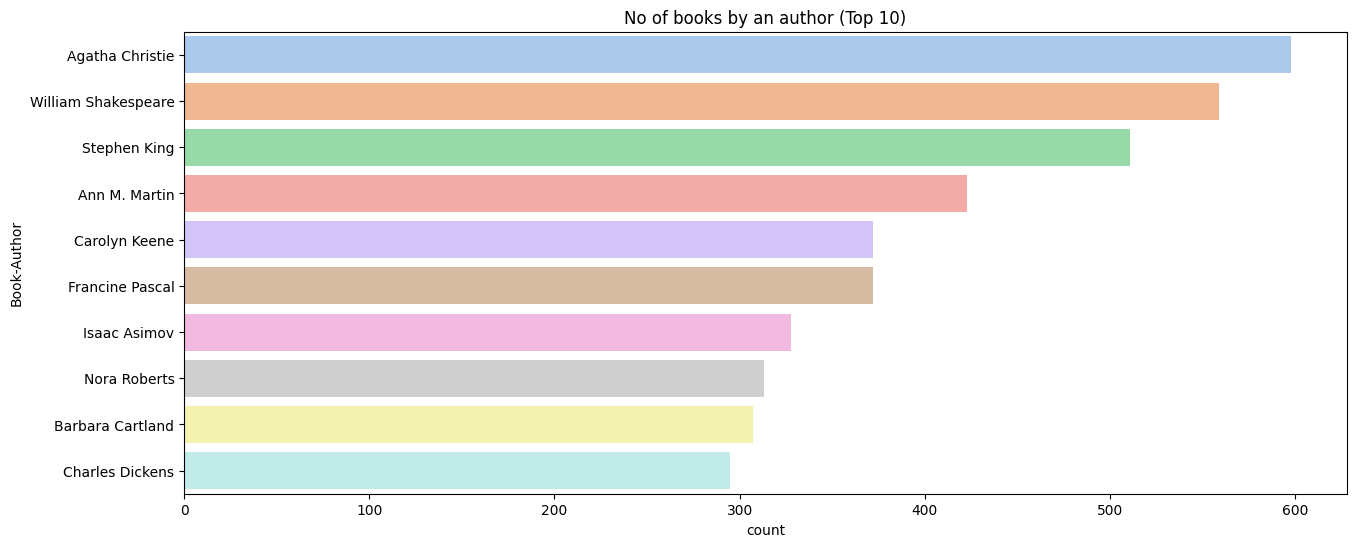

In [92]:
# Plot the top 10 Authors
plt.figure(figsize=(15,6))
sns.countplot(y="Book-Author", data=booksdata,order=booksdata['Book-Author'].value_counts().index[0:10],palette="pastel")
plt.title("No of books by an author (Top 10)")

Text(0.5, 1.0, 'No of books published by a publisher (Top 10)')

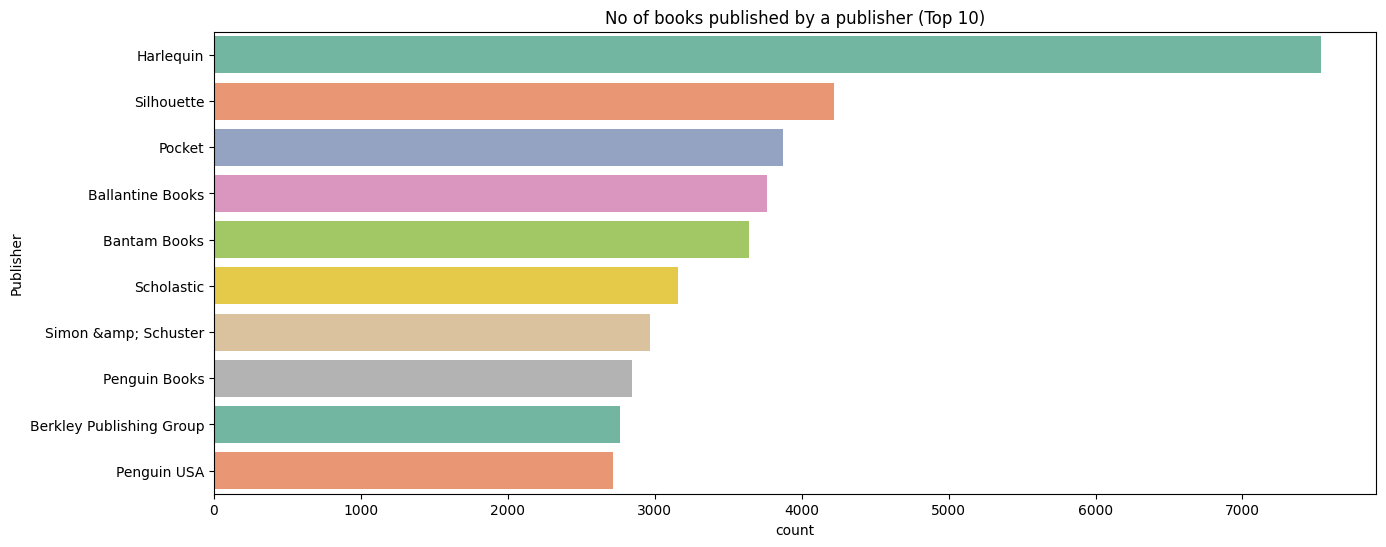

In [93]:
# Plot the top 10 publishers
plt.figure(figsize=(15,6))
sns.countplot(y="Publisher", data=booksdata,order=booksdata['Publisher'].value_counts().index[0:10],palette="Set2")
plt.title("No of books published by a publisher (Top 10)")

<Axes: xlabel='Book-Rating', ylabel='count'>

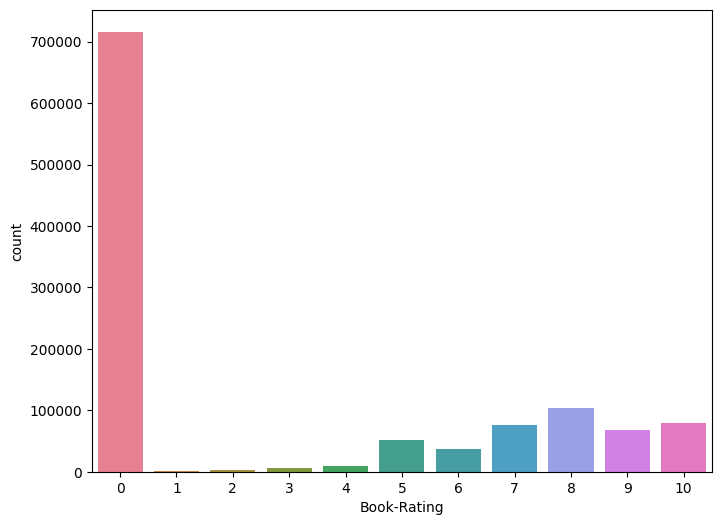

In [94]:
#plot the Implicit and Explicit ratings
plt.figure(figsize=(8,6))
sns.countplot(x="Book-Rating", data=ratingsdata,palette="husl")

Text(0.5, 1.0, 'Explicit Ratings')

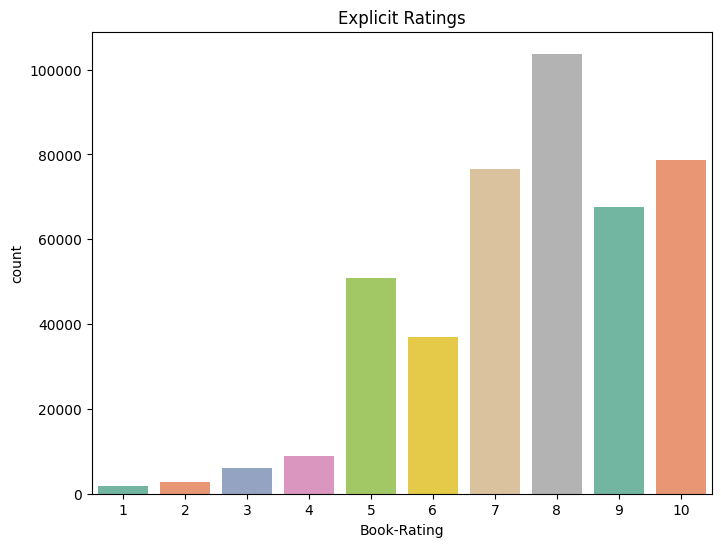

In [95]:
## Explicit Ratings
plt.figure(figsize=(8,6))
data = ratingsdata[ratingsdata['Book-Rating'] != 0]
sns.countplot(x="Book-Rating", data=data,palette="Set2")
plt.title("Explicit Ratings")

Text(0.5, 1.0, 'No of readers from each country (Top 10)')

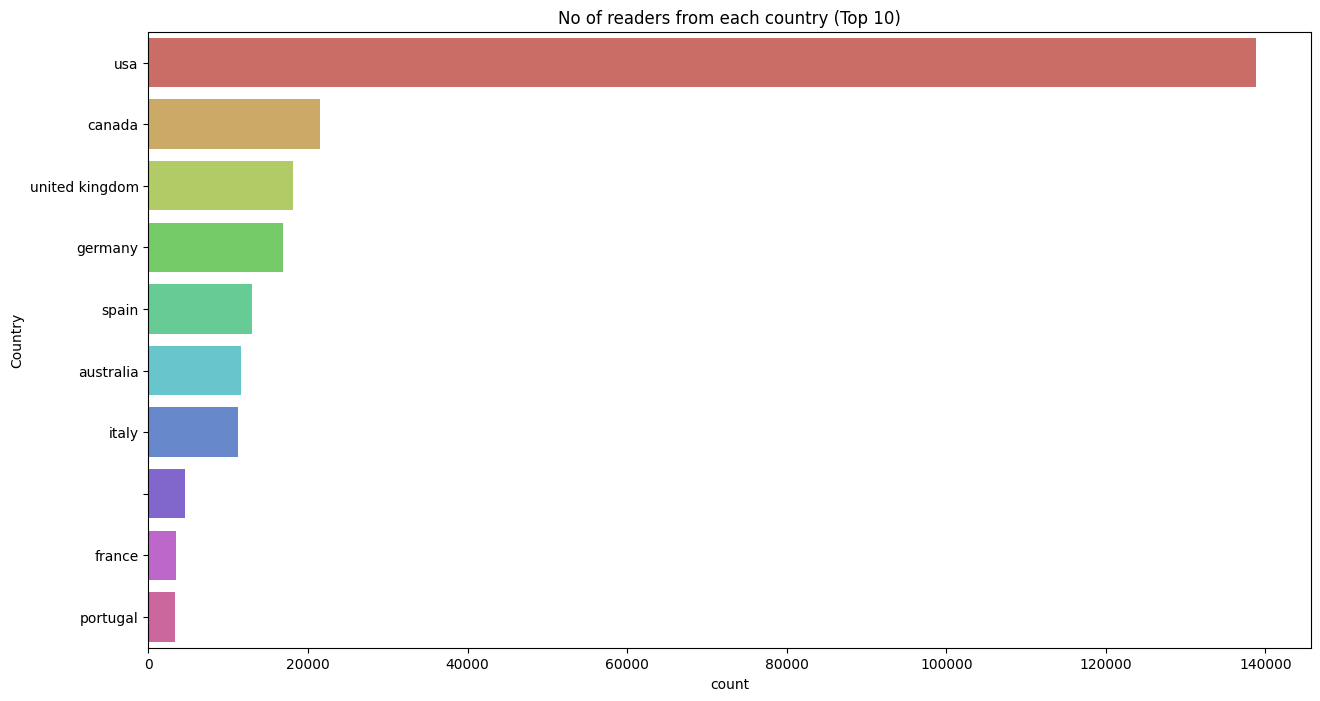

In [96]:
#Plot the Country Wise Readers
plt.figure(figsize=(15,8))
sns.countplot(y="Country", data=userdata, order=userdata['Country'].value_counts().index[0:10],palette="hls")
plt.title("No of readers from each country (Top 10)")

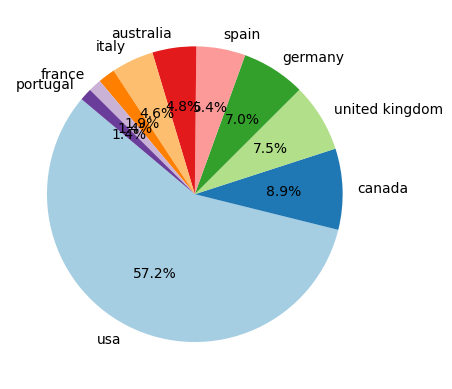

In [97]:
location_country=userdata['Country'].value_counts().reset_index()
location_country=location_country.sort_values(by='count', ascending=False)
top_countries = location_country.head(10)
plt.pie(top_countries['count'], labels=top_countries['Country'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.show()


Text(0.5, 1.0, 'Number of Ratings for a book (Top 10)')

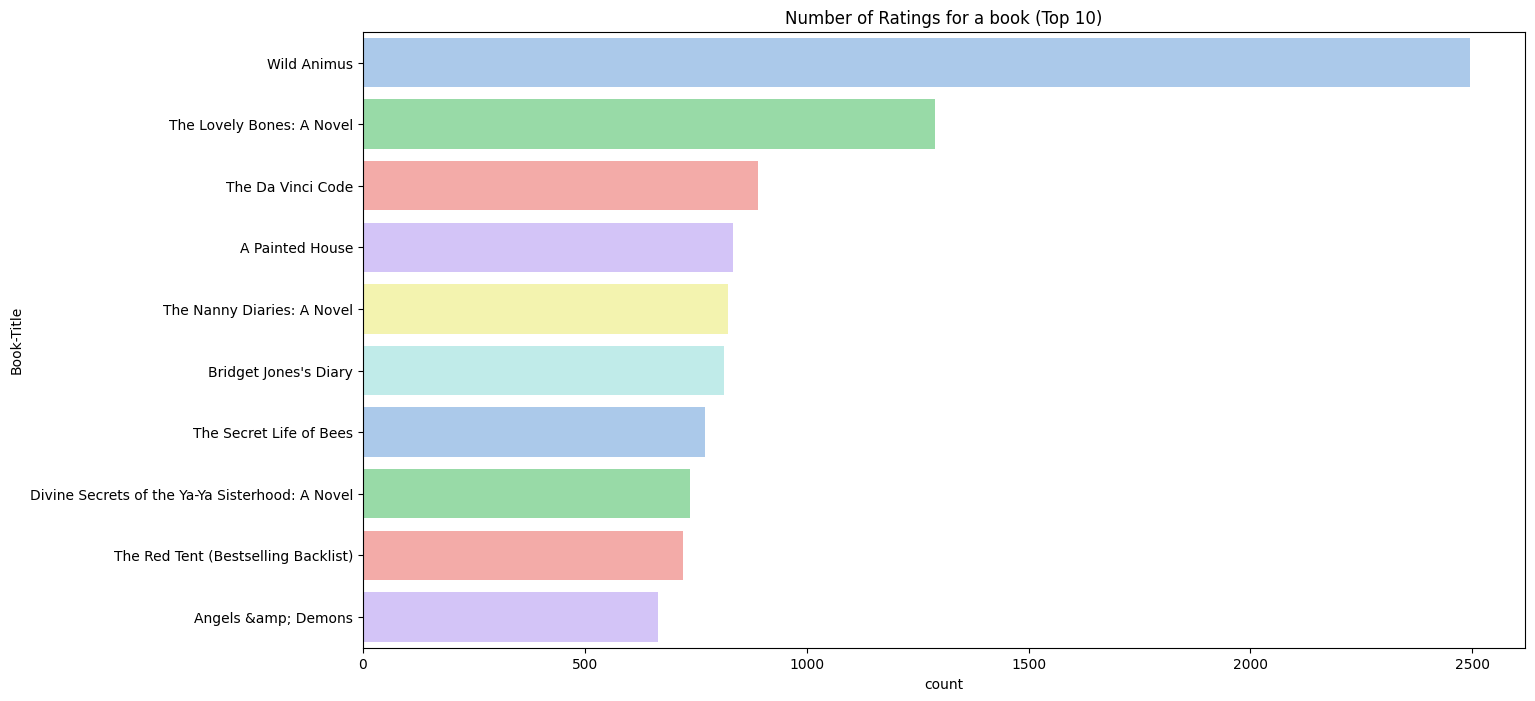

In [98]:
# Plot the top 10 most rated books
plt.figure(figsize=(15,8))
sns.countplot(y="Book-Title", data=books_user_ratings, order=books_user_ratings['Book-Title'].value_counts().index[0:10],palette="pastel6")
plt.title("Number of Ratings for a book (Top 10)")

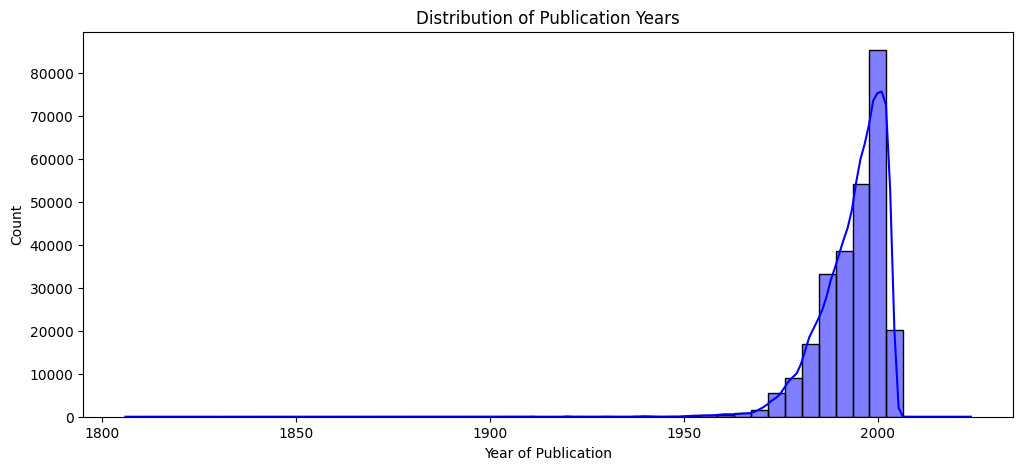

In [99]:
#Distribution of Publication Years
valid_years = booksdata[(booksdata['Year-Of-Publication'] >= 1500) & (booksdata['Year-Of-Publication'] <= 2024)]

plt.figure(figsize=(12, 5))
sns.histplot(valid_years['Year-Of-Publication'], bins=50, kde=True, color="blue")
plt.title("Distribution of Publication Years")
plt.xlabel("Year of Publication")
plt.ylabel("Count")
plt.show()

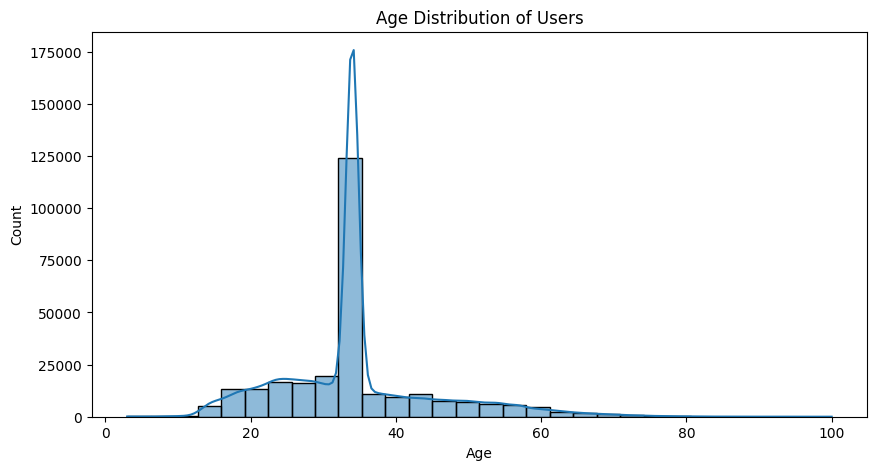

In [100]:
# Plot Age Distribution (Users Dataset)
plt.figure(figsize=(10, 5))
sns.histplot(userdata['Age'], bins=30, kde=True)
plt.title("Age Distribution of Users")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

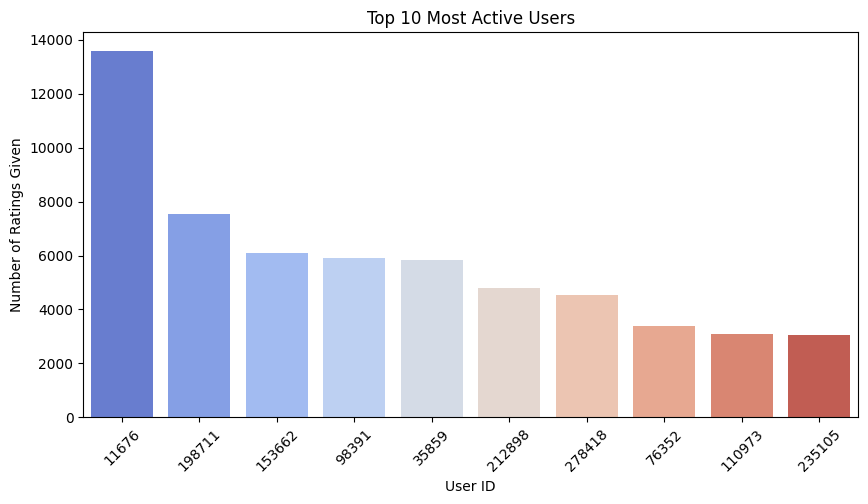

In [101]:
# Top 10 Most Active Users (Users who rated the most books)
top_users = ratingsdata['User-ID'].value_counts().head(10)
# Plot Most Active Users
plt.figure(figsize=(10, 5))
sns.barplot(x=top_users.index.astype(str), y=top_users.values, palette="coolwarm")
plt.title("Top 10 Most Active Users")
plt.xlabel("User ID")
plt.ylabel("Number of Ratings Given")
plt.xticks(rotation=45)
plt.show()

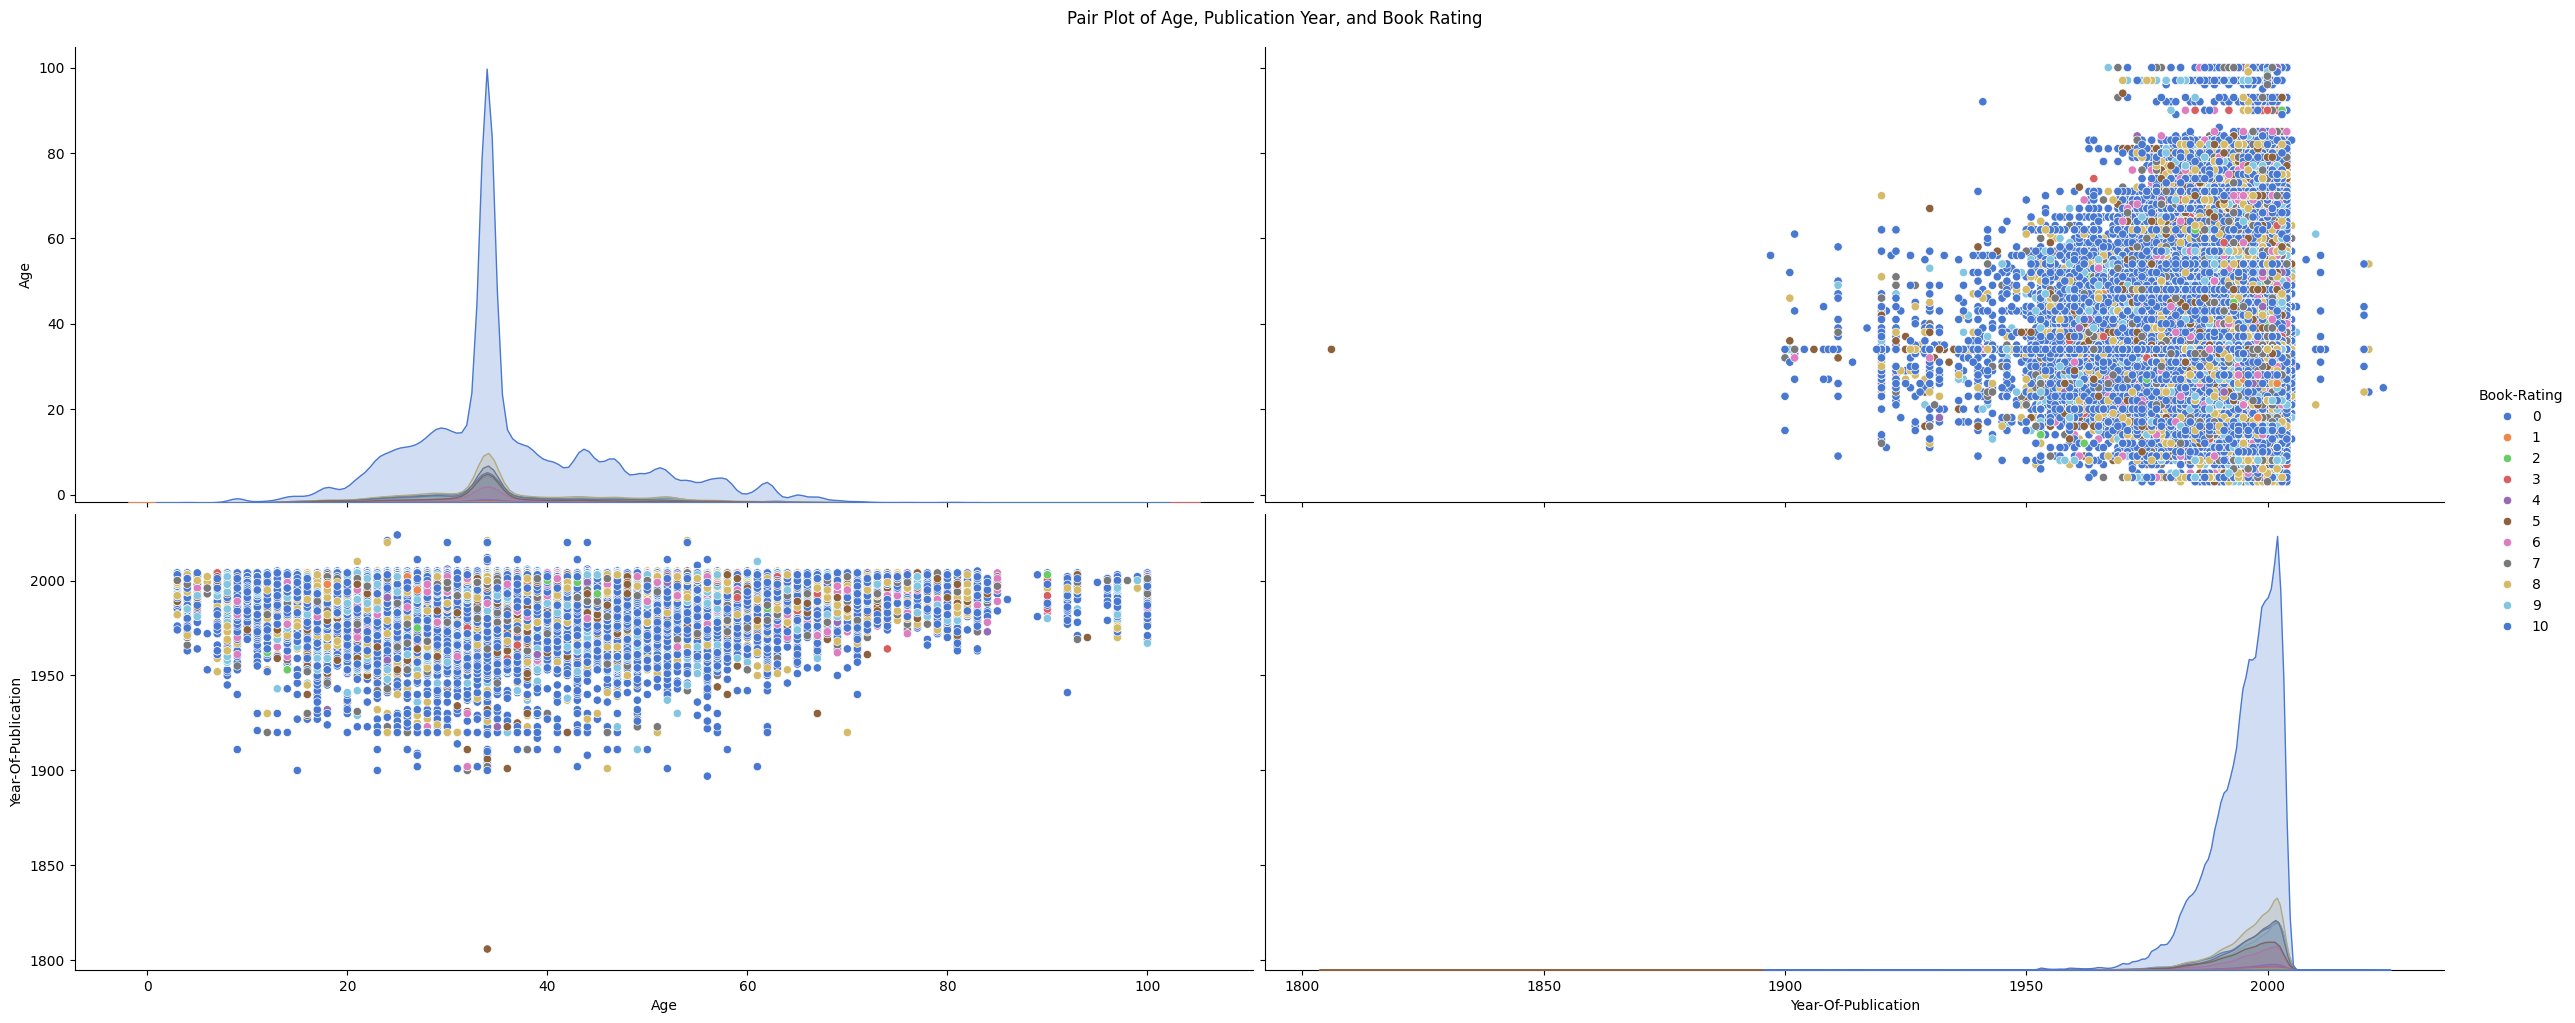

In [102]:
# Pair Plot to visualize relationships between all three variables with hue for Book-Rating
sns.pairplot(books_user_ratings[['Age', 'Year-Of-Publication', 'Book-Rating']],
             diag_kind="kde", palette="muted", hue='Book-Rating', height=5, aspect=2.5)
plt.suptitle("Pair Plot of Age, Publication Year, and Book Rating", y=1.02)
plt.show()

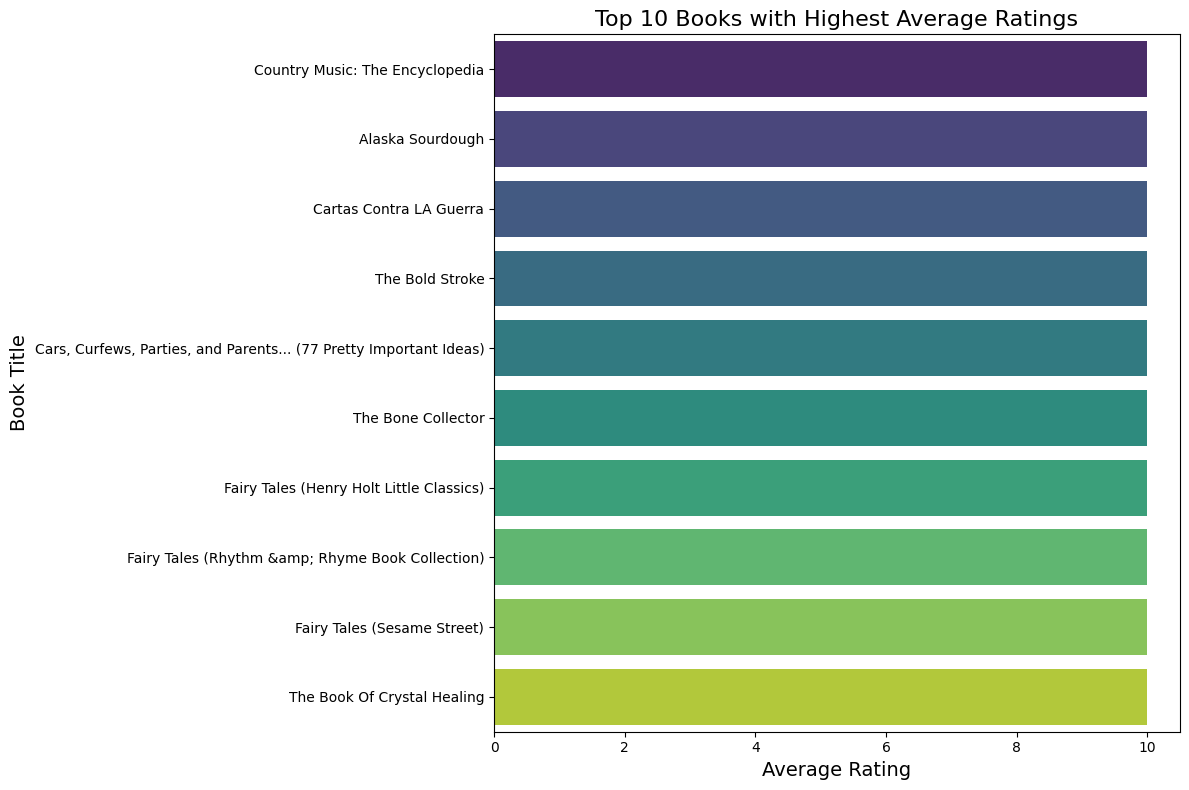

In [104]:
#Top 10 Books with Highest Average Ratings
###########################################
# Group by book title and calculate the average rating
avg_rating_books = books_user_ratings.groupby('Book-Title')['Book-Rating'].mean().reset_index(name='Avg-Rating')
# Sort the books by average rating
top_avg_rated_books = avg_rating_books.sort_values('Avg-Rating', ascending=False).head(10)

# Plot the top 10 books with the highest average ratings
plt.figure(figsize=(12, 8))
sns.barplot(x='Avg-Rating', y='Book-Title', data=top_avg_rated_books, palette='viridis', hue='Book-Title', dodge=False)
plt.title('Top 10 Books with Highest Average Ratings', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Book Title', fontsize=14)
plt.tight_layout()
plt.show()